In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statistics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score

import pickle

sns.set(color_codes=True)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


# RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# PCA
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
# Read in .csv file data into a dataframe

df_signal = pd.read_csv('signal-data.csv')

**EDA & Clean up Wherever Applicable**

In [ ]:
df_signal.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
df_signal.shape

(1567, 592)

In [ ]:
df_signal.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [ ]:
# Five-Point Summary for Continous Variables in dataset

print(df_signal.describe().T.to_string())

            count         mean          std         min          25%         50%          75%         max
0          1561.0  3014.452896    73.621787   2743.2400  2966.260000  3011.49000  3056.650000   3356.3500
1          1560.0  2495.850231    80.407705   2158.7500  2452.247500  2499.40500  2538.822500   2846.4400
2          1553.0  2200.547318    29.513152   2060.6600  2181.044400  2201.06670  2218.055500   2315.2667
3          1553.0  1396.376627   441.691640      0.0000  1081.875800  1285.21440  1591.223500   3715.0417
4          1553.0     4.197013    56.355540      0.6815     1.017700     1.31680     1.525700   1114.5366
5          1553.0   100.000000     0.000000    100.0000   100.000000   100.00000   100.000000    100.0000
6          1553.0   101.112908     6.237214     82.1311    97.920000   101.51220   104.586700    129.2522
7          1558.0     0.121822     0.008961      0.0000     0.121100     0.12240     0.123800      0.1286
8          1565.0     1.462862     0.073897   

**Various Feature Reduction Techniques**

In [ ]:
# Dropping features with missing values greater than 20%

df_signal_null = df_signal.isnull().sum() / len(df_signal)
missing_features = df_signal_null[df_signal_null > 0.20].index
df_signal.drop(missing_features, axis=1, inplace=True)

In [ ]:
# Column names of all features with missing values greater than 20% that was dropped

print(missing_features)

Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '578', '579',
       '580', '581'],
      dtype='object')


In [ ]:
# The remaining columns, post dropping columns with missing values greater than 20%

df_signal.shape

(1567, 560)

In [ ]:
# Filling rest of the dataframe missing values with means of respective columns

df_signal.fillna(df_signal.mean(), inplace=True)

In [ ]:
df_signal.isna().any()

Time         False
0            False
1            False
2            False
3            False
             ...  
586          False
587          False
588          False
589          False
Pass/Fail    False
Length: 560, dtype: bool

In [ ]:
# dropping the columns that have constant signals/Same values for all rows

cols = df_signal.select_dtypes([np.number]).columns
std = df_signal[cols].std()
cols_to_drop = std[std==0].index
df_signal.drop(cols_to_drop, axis=1,inplace=True)
df_signal.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [ ]:
# The remaining reduced number of columns, post dropping columns with constant values

df_signal.shape

(1567, 444)

In [ ]:
# Dropping the 'Time' feature based on functional knowledge

df_signal = df_signal.drop(['Time'],axis=1)

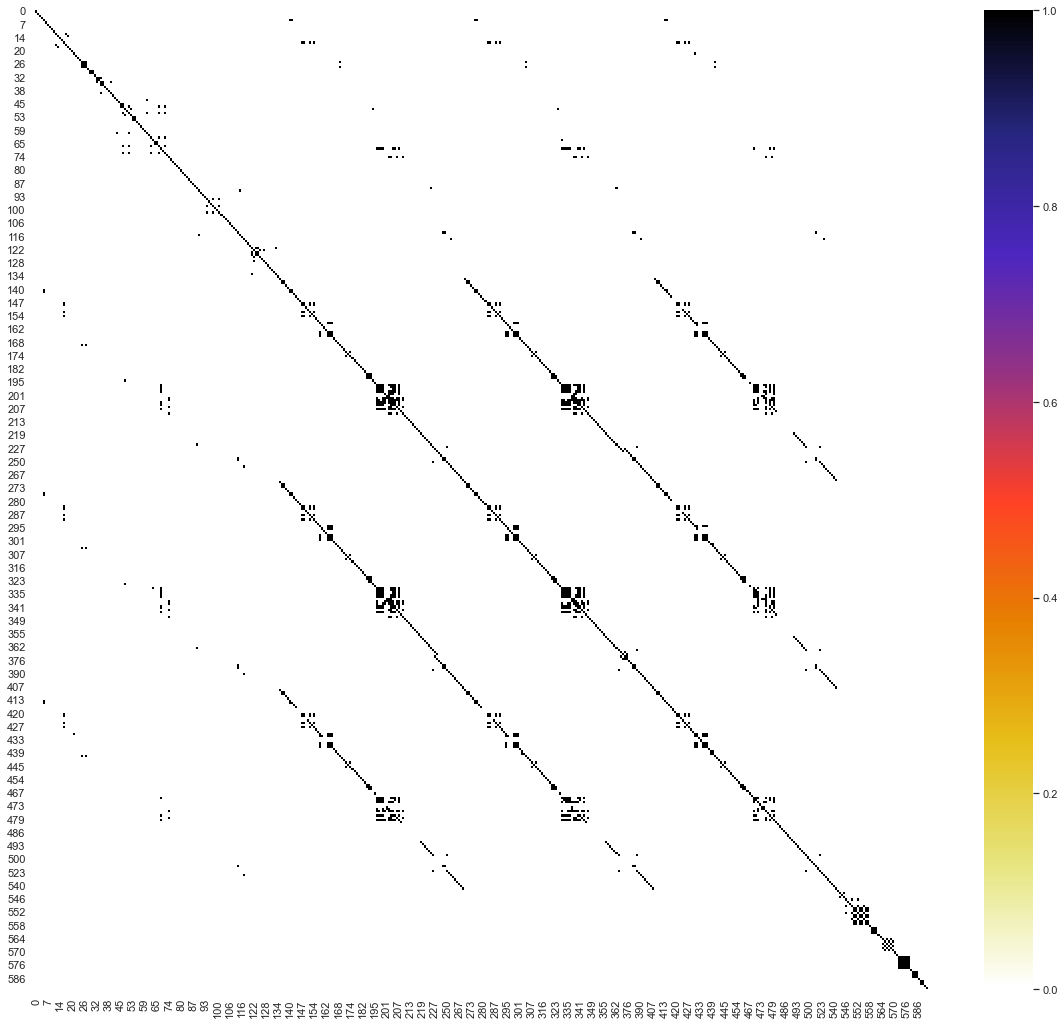

In [ ]:
# Checking for Multicollinearity in data

# Ccorrelation Check

plt.figure(figsize=(20,18))
corr=df_signal.corr()
sns.heatmap(abs(corr>0.65), cmap=plt.cm.CMRmap_r);

In [ ]:
# X data

#df_signal_corr = df_signal.copy()
df_signal_x = df_signal.drop(['Pass/Fail'],axis=1)

In [ ]:
# Removing higly correlated features

corr_matrix = df_signal_x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

# Drop features 
df_signal_x.drop(to_drop, axis=1, inplace=True)

In [ ]:
df_signal_x.head()

,0,1,2,3,4,7,8,9,10,11,...,564,565,570,571,572,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,0.1242,1.5005,0.0162,-0.0034,0.9455,...,6.444985,0.14561,533.8500,2.1113,8.95,0.5005,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,0.1247,1.4966,-0.0005,-0.0148,0.9627,...,6.444985,0.14561,535.0164,2.4335,5.92,0.5019,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,0.1241,1.4436,0.0041,0.0013,0.9615,...,1.100000,0.62190,535.0245,2.0293,11.21,0.4958,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,0.1217,1.4882,-0.0124,-0.0033,0.9629,...,7.320000,0.16300,530.5682,2.0253,9.33,0.4990,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,0.1235,1.5031,-0.0031,-0.0072,0.9569,...,6.444985,0.14561,532.0155,2.0275,8.83,0.4800,0.4766,0.020200,0.014900,73.843200


In [ ]:
# The remaining reduced number of columns, post dropping columns from pairs with correlation value higher that 0.65

df_signal_x.shape

(1567, 188)

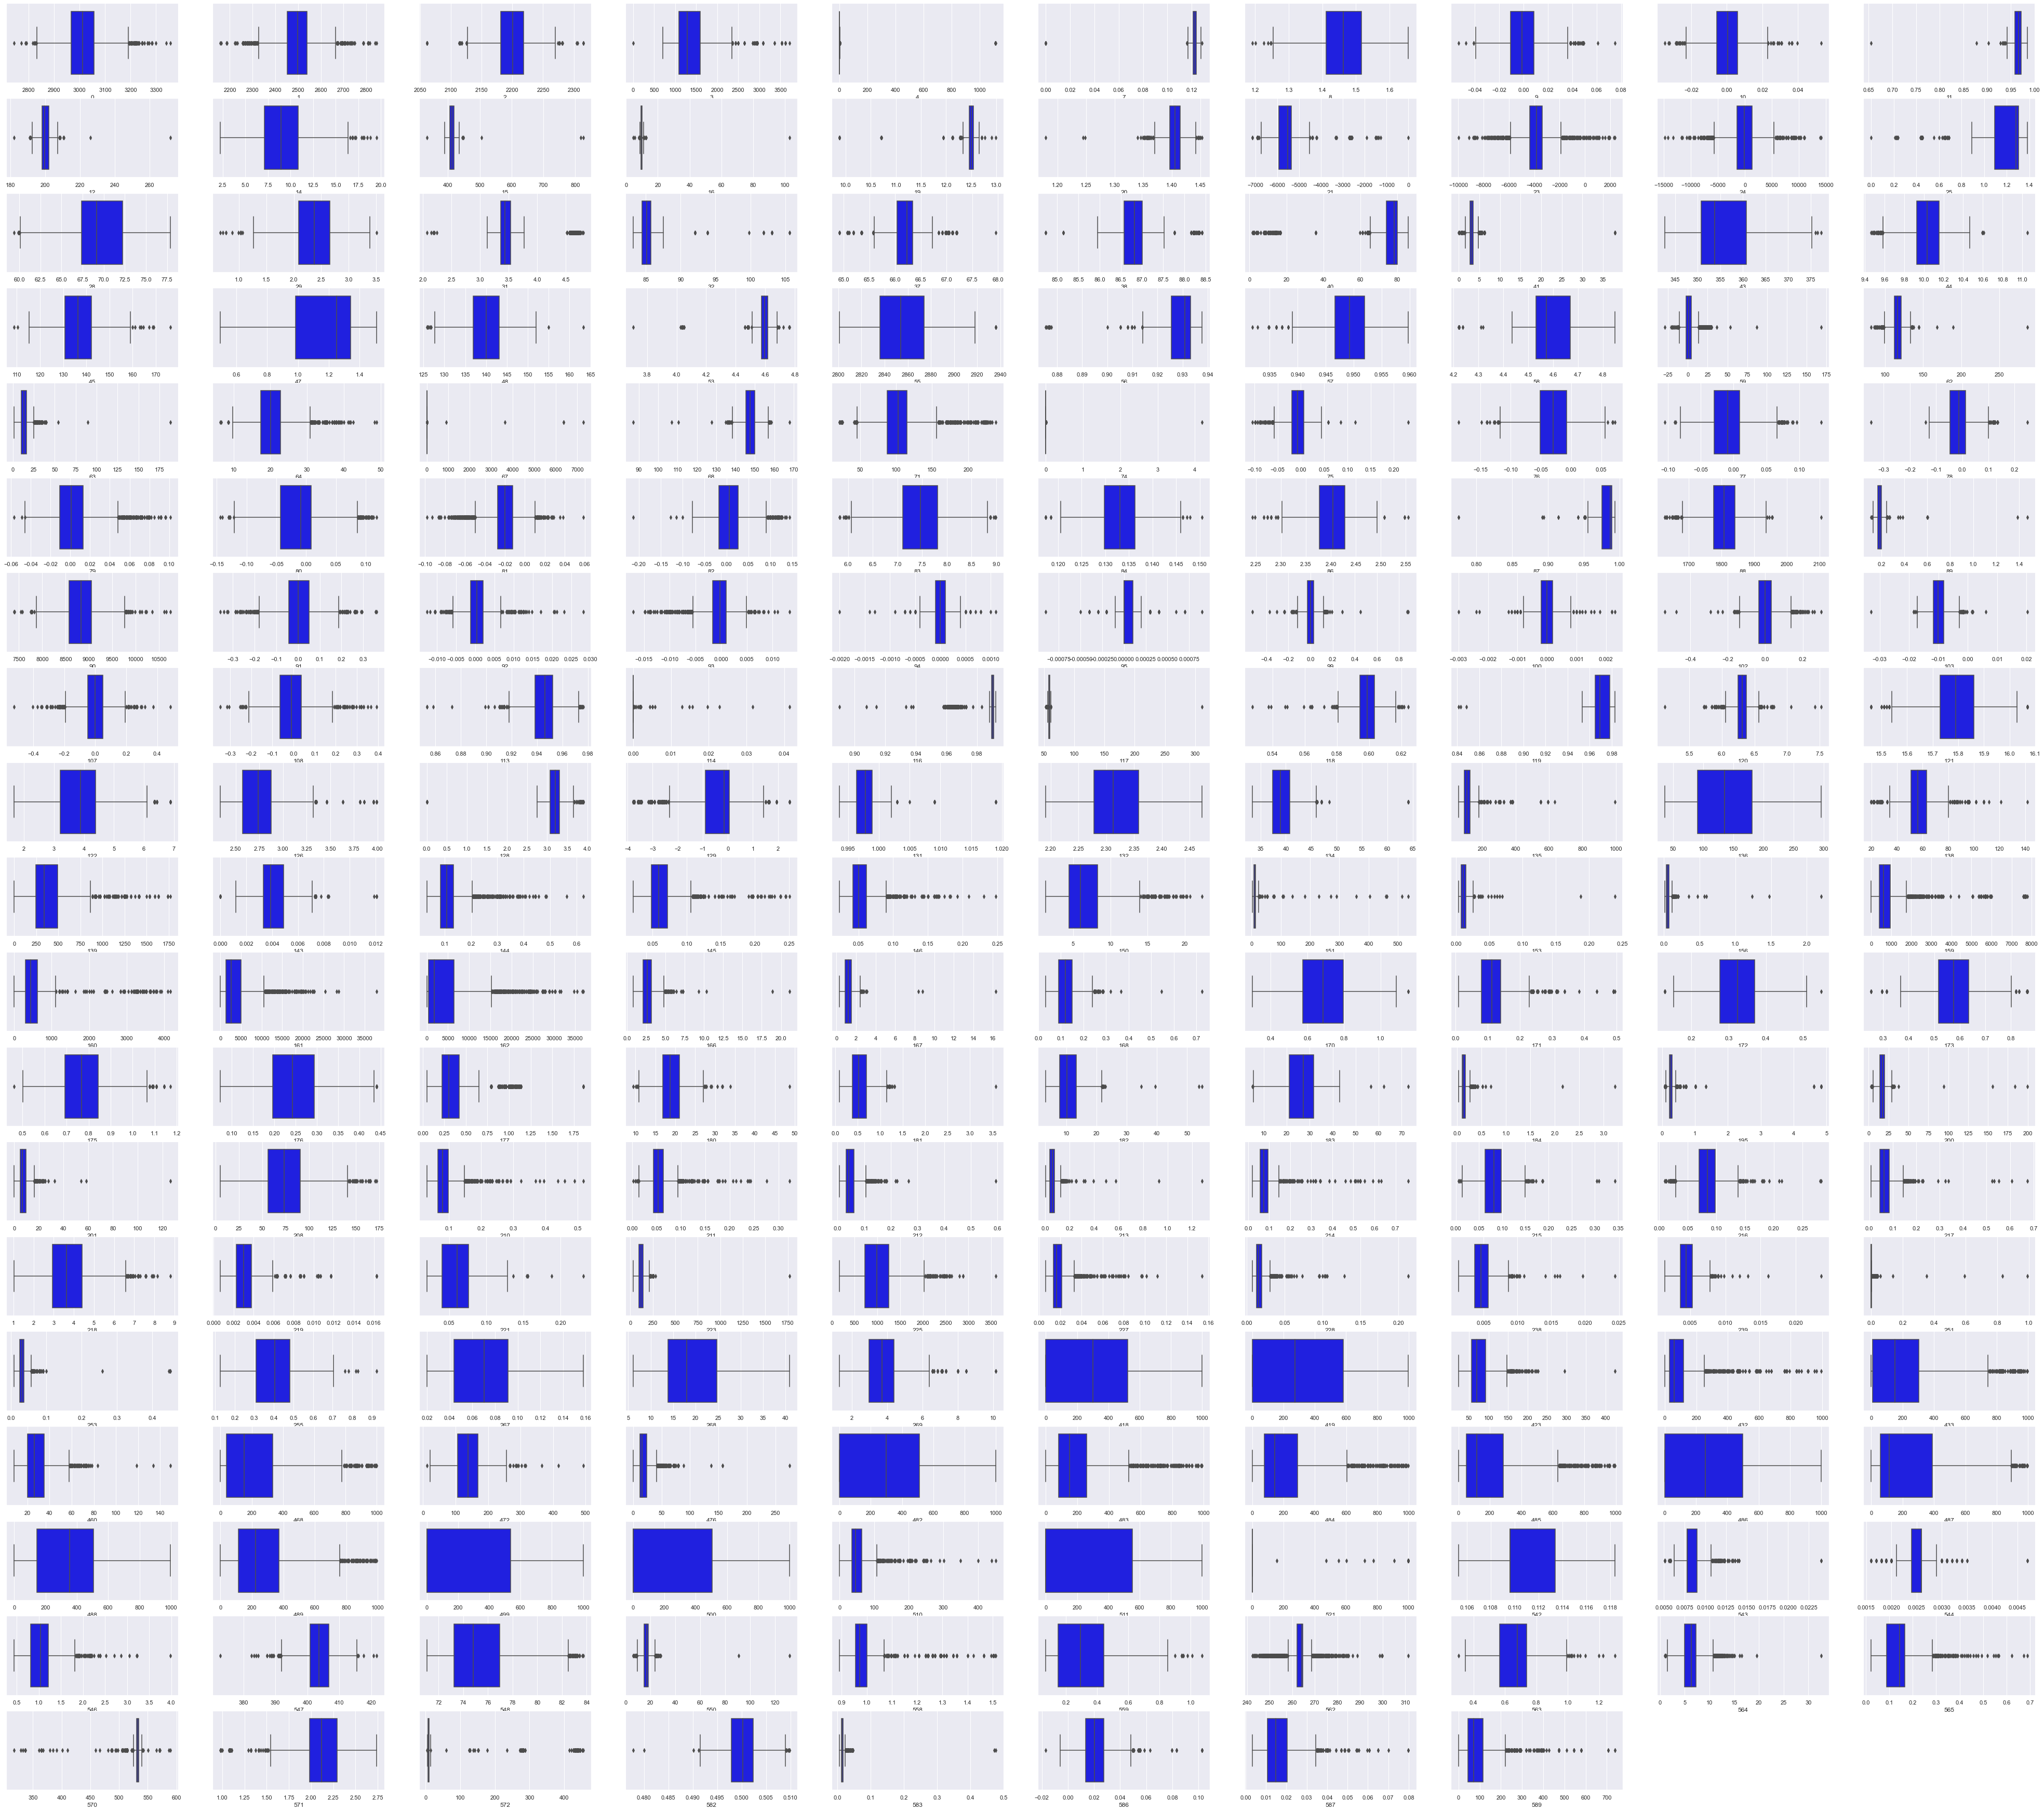

In [ ]:
# UNIVARIATE ANALYSIS - 1

# Boxplot for all features

plt.figure(figsize=(70, 70))
col = 1
for i in df_signal_x.columns:
    plt.subplot(21,10, col)
    sns.boxplot(df_signal_x[i],color='blue')
    col += 1

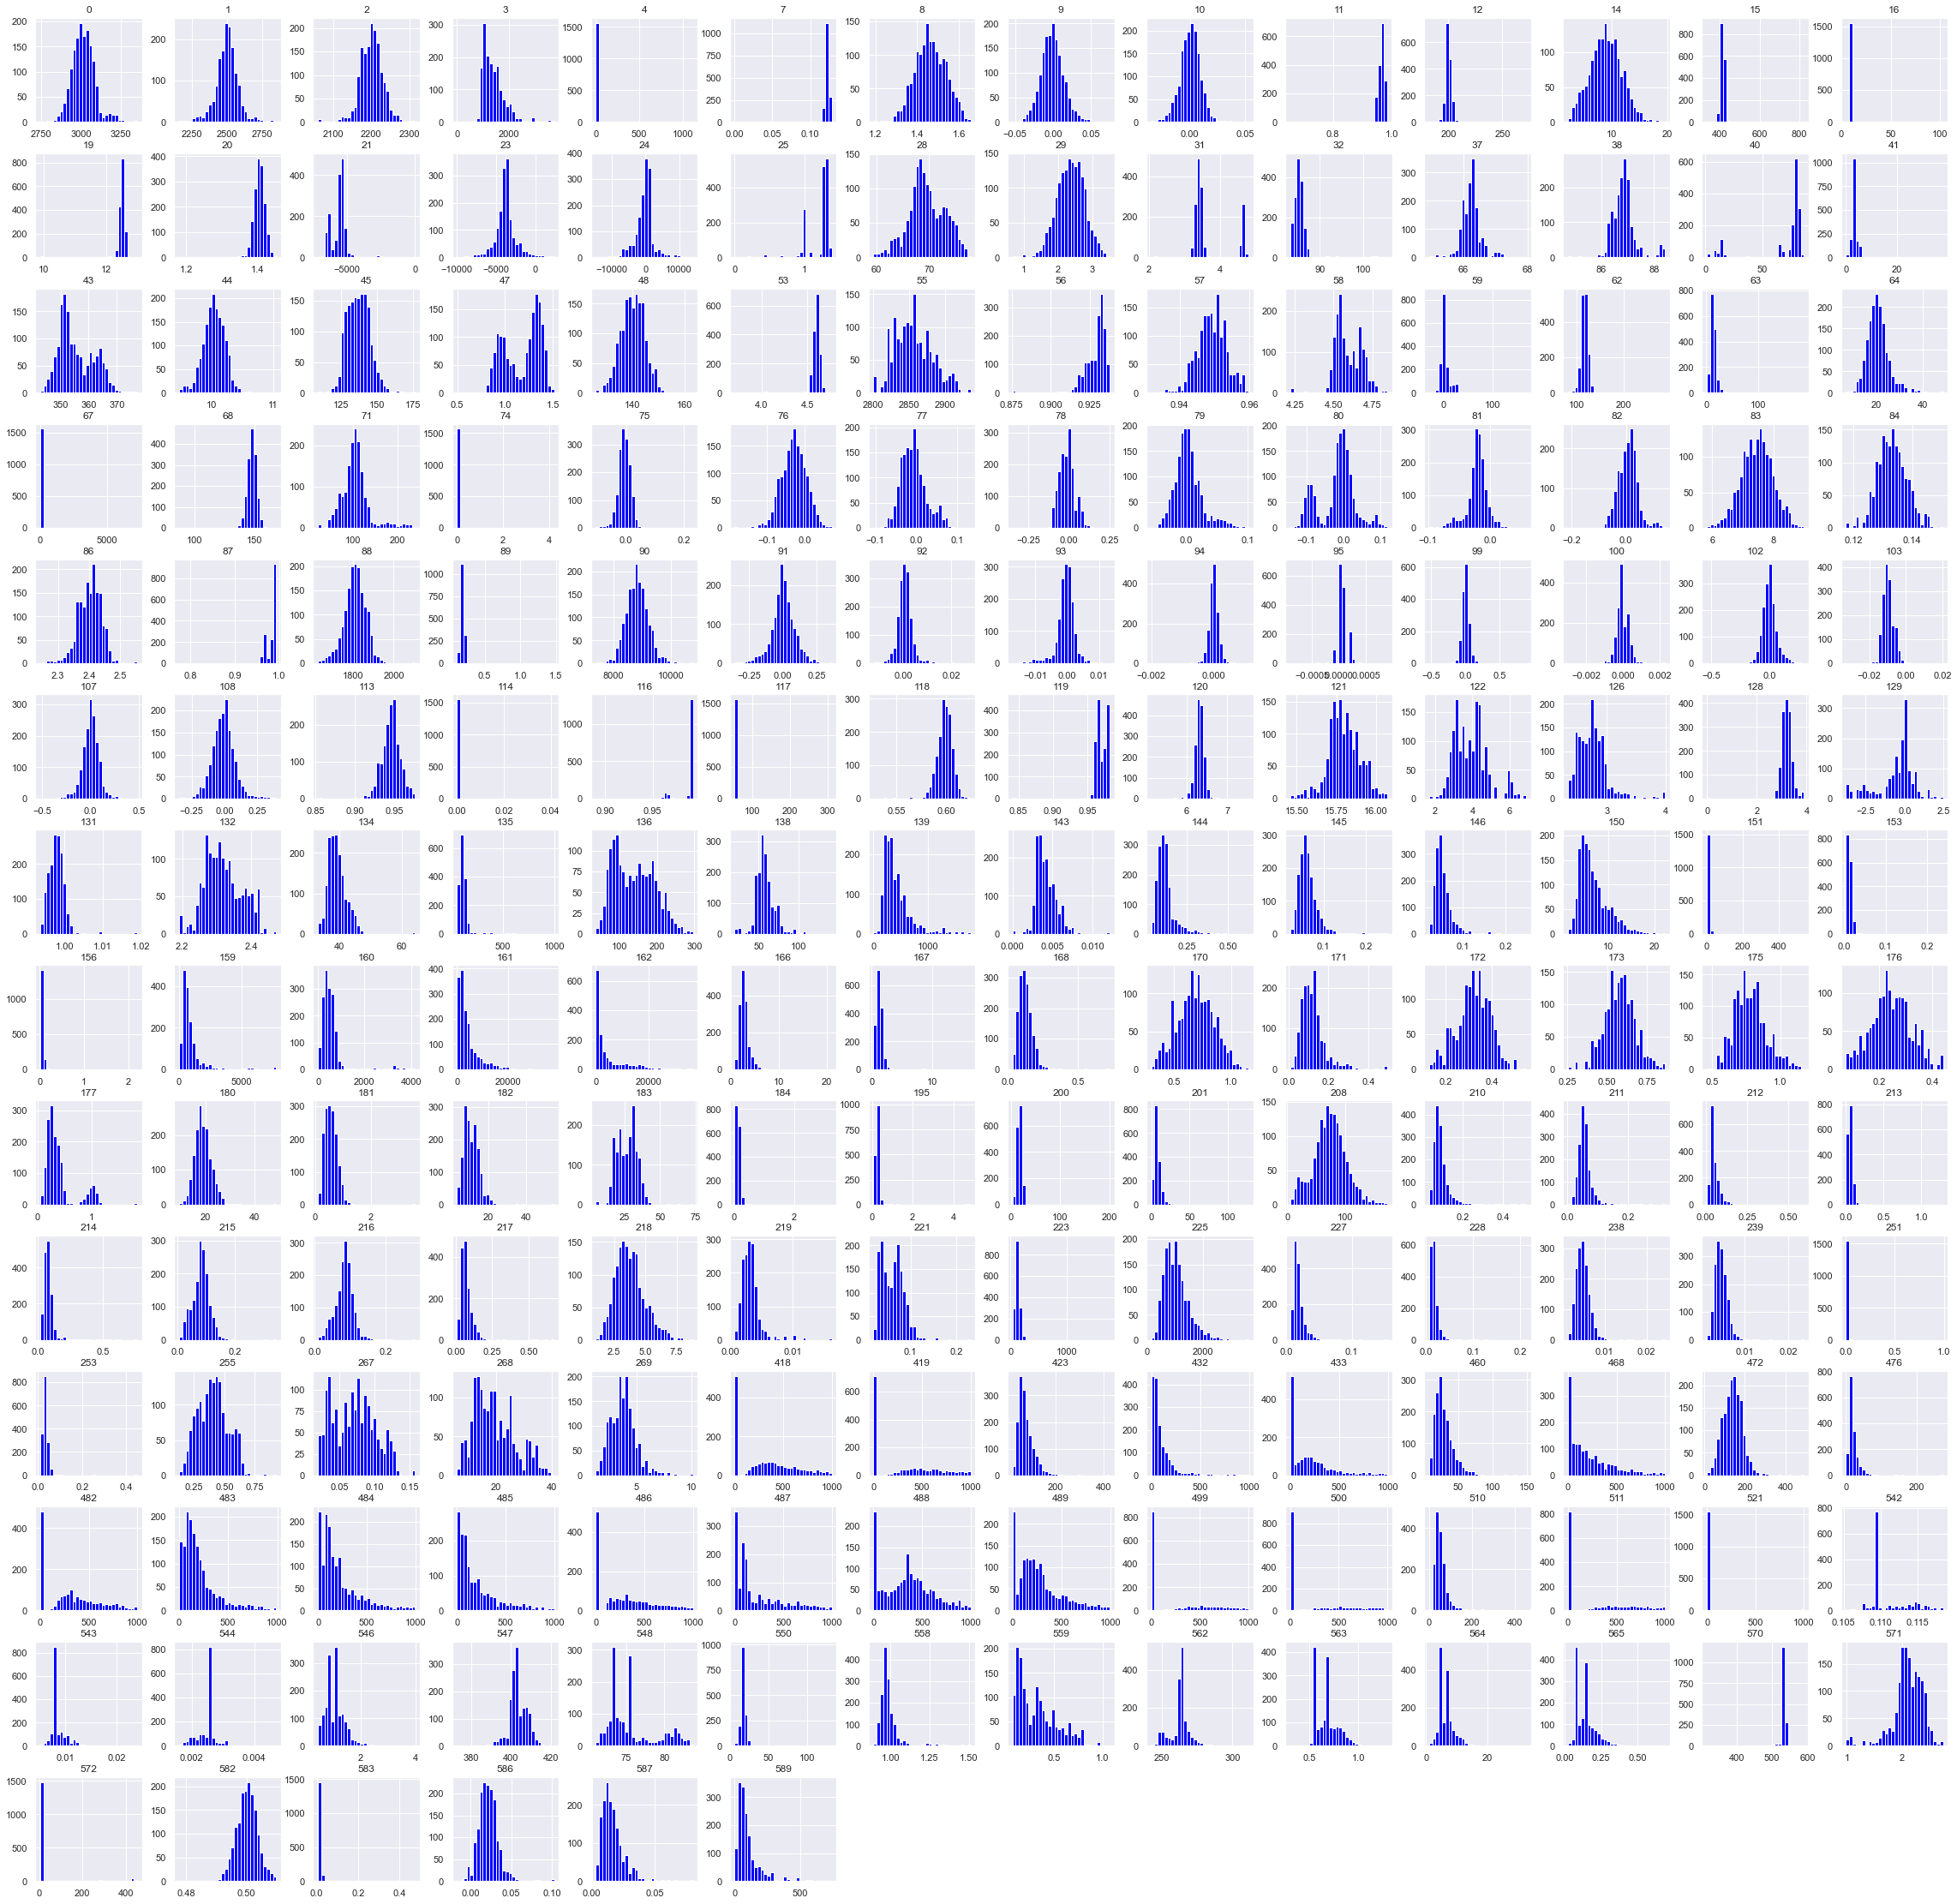

In [ ]:
# UNIVARIATE ANALYSIS - 2

#plotting histogram to check for the frequency of values within a variable
df_signal_x.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

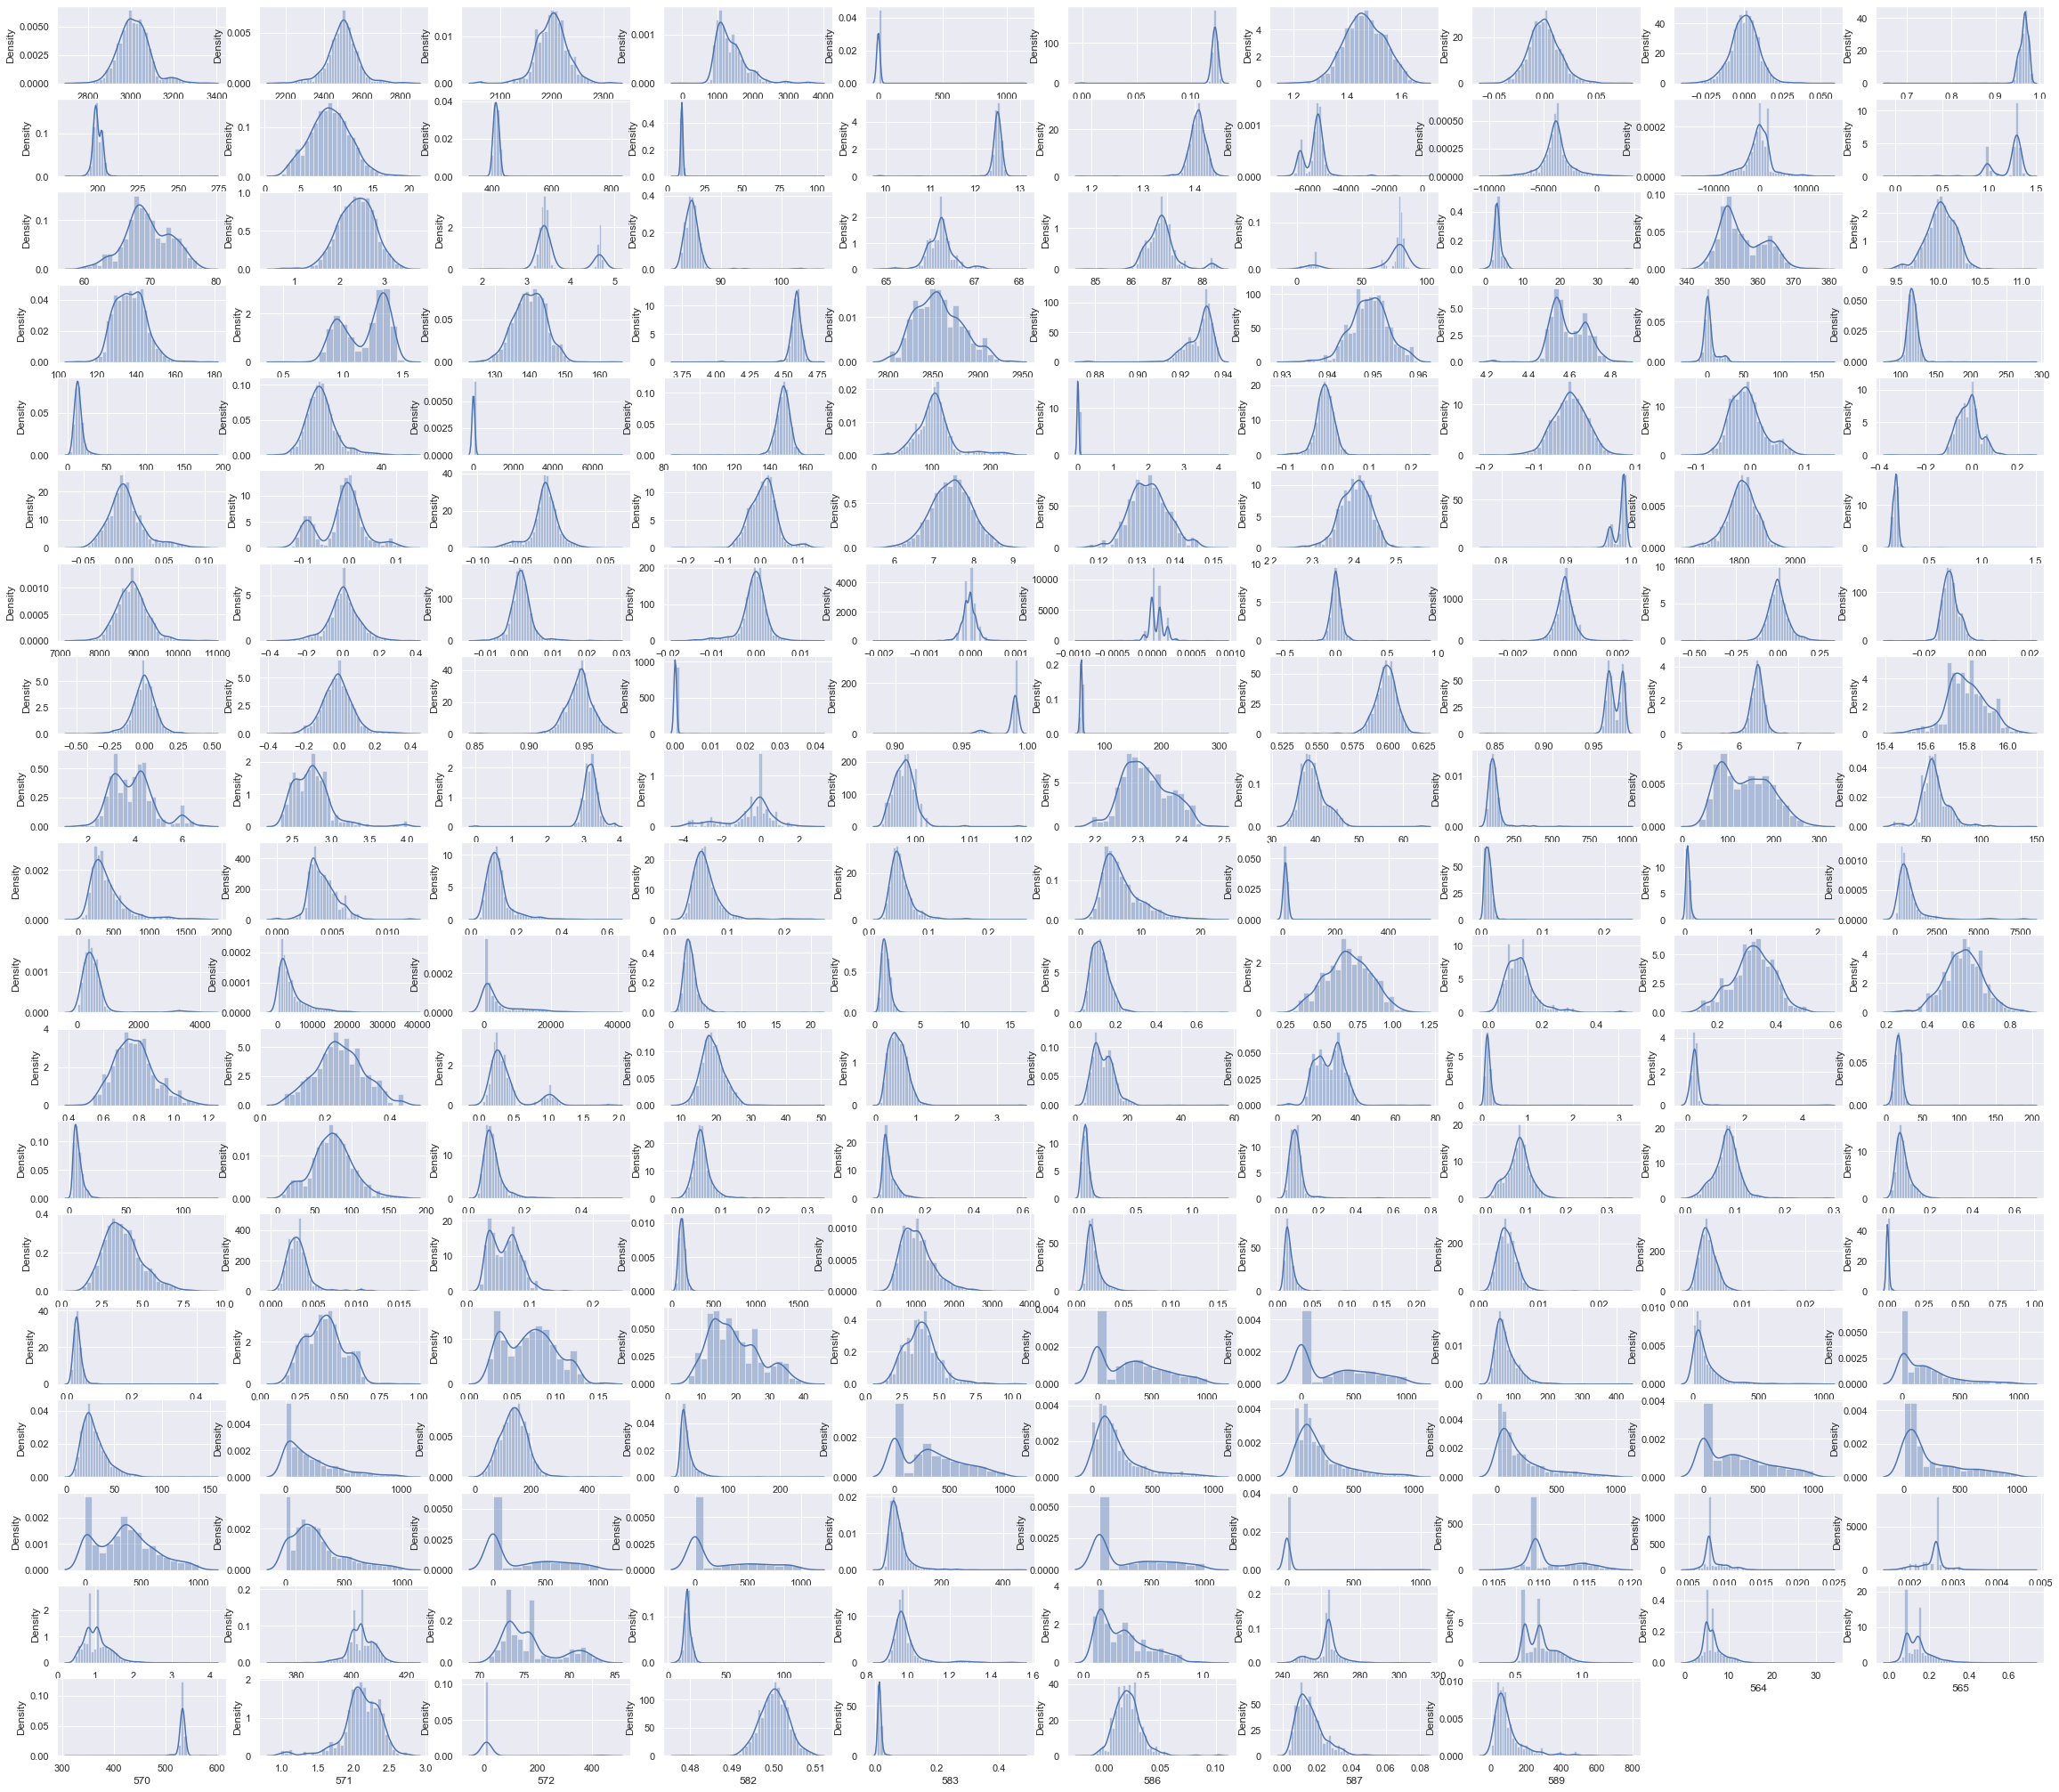

In [ ]:
# UNIVARIATE ANALYSIS - 3

# density plot to check for the distribution of the variables

plt.figure(figsize=(40, 40))
col = 1
for i in df_signal_x.columns:
    plt.subplot(21, 10, col)
    sns.distplot(df_signal_x[i], color = 'b')
    col += 1 

Index(['0', '1', '2', '3', '4', '7', '8', '9', '10', '11',
       ...
       '564', '565', '570', '571', '572', '582', '583', '586', '587', '589'],
      dtype='object', length=188)


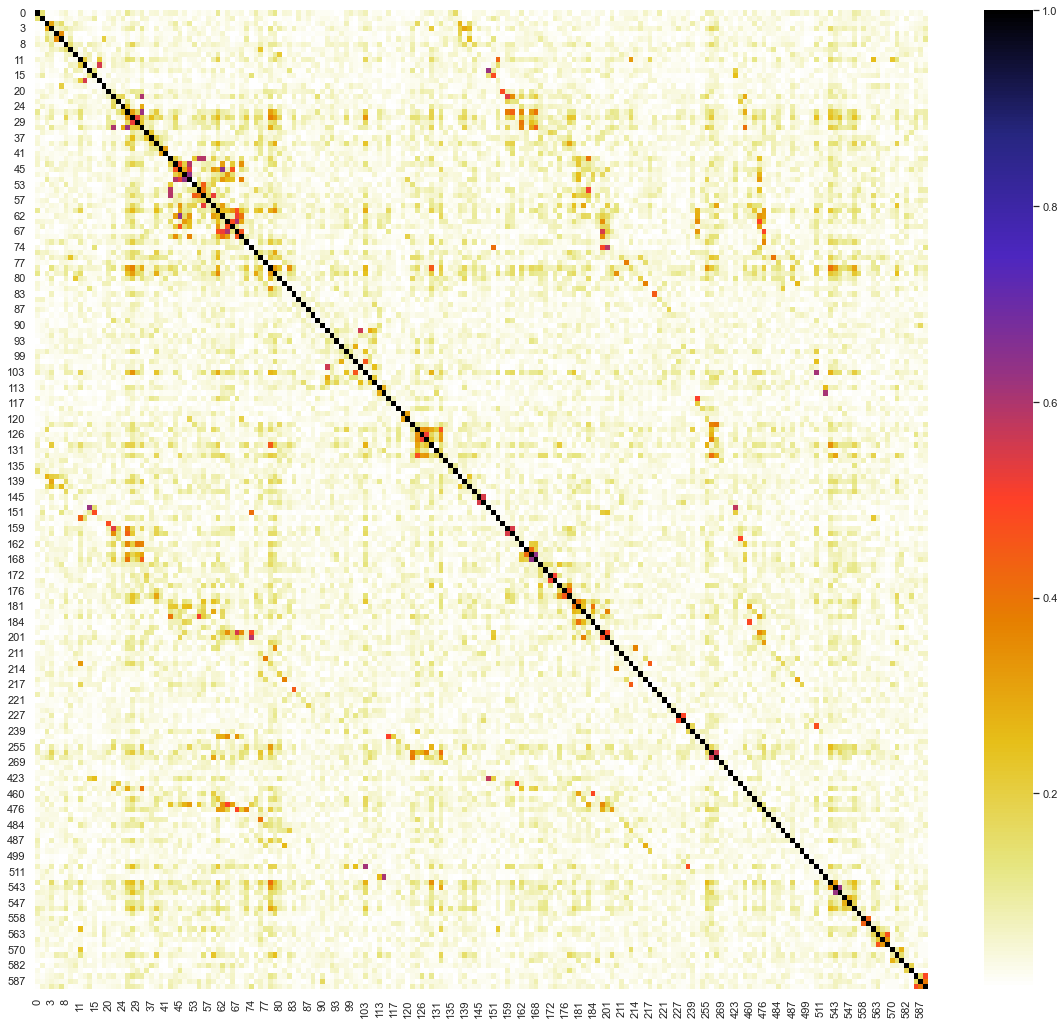

In [ ]:
# MULTIVARIATE ANALYSIS

columns = df_signal_x.columns
print(columns)

# HEAT MAP

plt.figure(figsize=(20,18))
corr=df_signal_x.corr()
sns.heatmap(abs(corr), cmap=plt.cm.CMRmap_r);

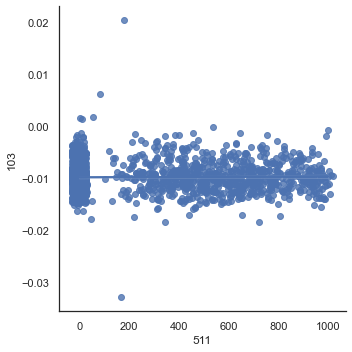

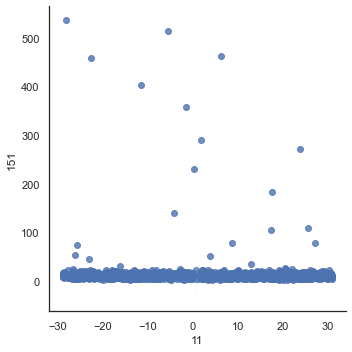

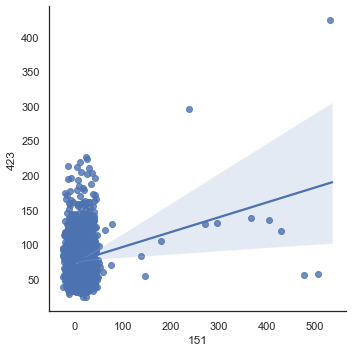

In [ ]:
# BIVARIATE ANALYSIS

with sns.axes_style("white"):
    sns.lmplot('511','103', data=df_signal_x, x_jitter = 30)
    sns.lmplot('11','151', data=df_signal_x, x_jitter = 30)
    sns.lmplot('151','423', data=df_signal_x, x_jitter = 30)

In [ ]:
# Segregating Target & Predictor values

X = df_signal_x
y = df_signal['Pass/Fail']

In [ ]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [ ]:
# Balancing Dataset based on the target Column Value Counts - Upsampling Minority Class Dataset

df_signal_comb = pd.concat([X,y],axis=1)


#create two different dataframe of majority and minority class 
df_signal_comb_majority = df_signal_comb[(df_signal_comb['Pass/Fail']==-1)] 
df_signal_comb_minority = df_signal_comb[(df_signal_comb['Pass/Fail']==1)] 

# upsample minority class
df_signal_comb_minority_upsampled = resample(df_signal_comb_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1463 , # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_signal_comb_upsampled = pd.concat([df_signal_comb_majority,df_signal_comb_minority_upsampled])

In [ ]:
df_signal_comb_upsampled.shape

(2926, 189)

In [ ]:
# label encoding the target class

df_signal_comb_upsampled['Pass/Fail']=df_signal_comb_upsampled['Pass/Fail'].replace([-1,1],[1,0])

In [ ]:
X_balanced = df_signal_comb_upsampled.drop(['Pass/Fail'],axis=1)
y_balanced = df_signal_comb_upsampled['Pass/Fail']

In [ ]:
# Split X and Y into training and test set in 80:20 ratio

X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=42)

In [ ]:
X_balanced_train_z = X_balanced_train.apply(zscore)
X_balanced_test_z = X_balanced_test.apply(zscore)

In [ ]:
# Using unscaled train data to check the summary of each features in the dataset
print(X_balanced_train.describe().T.to_string())

      count         mean          std         min          25%          50%          75%         max
0    2340.0  3010.970485    81.599762   2787.4900  2956.990000  3000.475000  3054.340000   3356.3500
1    2340.0  2496.544301    74.041137   2158.7500  2457.420000  2499.720000  2535.985000   2846.4400
2    2340.0  2199.870481    30.562677   2060.6600  2176.341700  2197.644400  2217.769475   2315.2667
3    2340.0  1368.265009   390.906013      0.0000  1069.674025  1277.859200  1582.564600   3619.7397
4    2340.0     2.749245    39.762152      0.6815     1.030400     1.310100     1.513800   1112.4728
7    2340.0     0.122130     0.005977      0.0000     0.121100     0.122300     0.123800      0.1276
8    2340.0     1.467074     0.067181      1.1910     1.422800     1.467500     1.513450      1.6564
9    2340.0    -0.001884     0.014470     -0.0534    -0.010725    -0.001600     0.006925      0.0609
10   2340.0     0.000453     0.009657     -0.0329    -0.005700     0.001100     0.006425   

In [ ]:
print(X_balanced_test.describe().T.to_string())

     count         mean          std         min          25%          50%          75%           max
0    586.0  3008.945568    81.760693   2743.2400  2951.842500  2995.925000  3053.250000   3284.820000
1    586.0  2498.585753    79.881340   2162.8700  2459.895000  2501.765000  2541.962500   2809.790000
2    586.0  2198.579321    30.551789   2060.6600  2178.175025  2197.677800  2216.477800   2315.266700
3    586.0  1362.658231   421.688582    711.0258  1058.206100  1268.585200  1551.694700   3715.041700
4    586.0     3.221503    45.988584      0.6815     1.003800     1.300400     1.513800   1114.536600
7    586.0     0.121790     0.008954      0.0000     0.121100     0.122200     0.123975      0.128600
8    586.0     1.466456     0.067918      1.2005     1.424300     1.467200     1.514400      1.648600
9    586.0    -0.001977     0.014936     -0.0410    -0.011000    -0.002300     0.005675      0.074900
10   586.0     0.000809     0.009406     -0.0349    -0.005075     0.001350     0.0

In [ ]:
print(df_signal_x.describe().T.to_string())

      count         mean          std         min         25%          50%         75%         max
0    1567.0  3014.452896    73.480613   2743.2400  2966.66500  3011.840000  3056.54000   3356.3500
1    1567.0  2495.850231    80.227793   2158.7500  2452.88500  2498.910000  2538.74500   2846.4400
2    1567.0  2200.547318    29.380932   2060.6600  2181.09995  2200.955600  2218.05550   2315.2667
3    1567.0  1396.376627   439.712852      0.0000  1083.88580  1287.353800  1590.16990   3715.0417
4    1567.0     4.197013    56.103066      0.6815     1.01770     1.317100     1.52960   1114.5366
7    1567.0     0.121822     0.008936      0.0000     0.12110     0.122400     0.12380      0.1286
8    1567.0     1.462862     0.073849      1.1910     1.41125     1.461600     1.51685      1.6564
9    1567.0    -0.000841     0.015107     -0.0534    -0.01080    -0.001300     0.00840      0.0749
10   1567.0     0.000146     0.009296     -0.0349    -0.00560     0.000400     0.00590      0.0530
11   1567.

In [ ]:
# Creating and training a Gaussian Naive Bayes model on the input dataset

GNB_model = GaussianNB()
GNB_model.fit(X_balanced_train_z, y_balanced_train)

GaussianNB()

In [ ]:
GNB_model_score = GNB_model.score(X_balanced_train_z, y_balanced_train)
print('Accuracy Score of Training Data: ', GNB_model_score)

Accuracy Score of Training Data:  0.6311965811965812


In [ ]:
GNB_y_predict= GNB_model.predict(X_balanced_test_z)
GNB_model_score = accuracy_score(y_balanced_test, GNB_y_predict)
print('Accuracy Score of Test Data:', GNB_model_score)

Accuracy Score of Test Data: 0.5119453924914675


**Cross Validation**

In [ ]:
# K-Fold Cross Validation Technique

num_folds = 10
seed = 7

kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)
results = cross_val_score (GNB_model, X_balanced_train_z, y_balanced_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.63675214 0.73931624 0.64957265 0.65384615 0.61111111 0.54700855
 0.58119658 0.61538462 0.62820513 0.5982906 ]
Accuracy: 62.607% (4.862%)


In [ ]:
X_balanced.shape

(2926, 188)

In [ ]:
# LOOCV : Leave One Out Cross Validation Technique

loocv = LeaveOneOut()

y_actual, y_predict = list(), list()

# enumerate splits

for train, test in loocv.split(X_balanced, y_balanced):

    train_list = list(train)
    
    test_list = list(test)
    
    X_balanced_train_loocv = X_balanced.iloc[train_list]
    X_balanced_test_loocv = X_balanced.iloc[test_list]
    
    y_balanced_train_loocv = y_balanced.iloc[train_list]
    y_balanced_test_loocv = y_balanced.iloc[test_list]
    
    scaler_train = StandardScaler()
    model = scaler_train.fit(X_balanced_train_loocv)
    X_balanced_train_loocv_z = model.transform(X_balanced_train_loocv)
    
    scaler_test = StandardScaler()
    model = scaler_test.fit(X_balanced_test_loocv)
    X_balanced_test_loocv_z = model.transform(X_balanced_test_loocv)
    
    # fit model
    GNB_loocv = GaussianNB()
    GNB_loocv.fit(X_balanced_train_loocv_z, y_balanced_train_loocv)
    
    # evaluate model
    yhat = GNB_loocv.predict(X_balanced_test_loocv_z)
    
    # store the actual and predicted y varaible values in 2 different arrays
    y_actual.append(y_balanced_test_loocv)
    y_predict.append(yhat)
    
# calculate accuracy
Accuracy = accuracy_score(y_actual, y_predict)
print('Accuracy: %.3f' % Accuracy)

Accuracy: 0.500


In [ ]:
# Repeated Stratified K Fold Technique

cv_method = RepeatedStratifiedKFold(n_splits=10, random_state=999)

**Hyperparameter Tuning**

In [ ]:
# To transform the data to make it look more Gaussian like

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Creating a Grid Search CV model
GridSearch_GNB = GridSearchCV(estimator=GNB_model, param_grid=params_NB, return_train_score=True, cv=cv_method, verbose=1, scoring='accuracy', n_jobs=-1)
Data_transformed = PowerTransformer().fit_transform(X_balanced_test_z)
GridSearch_GNB.fit(Data_transformed, y_balanced_test);

Fitting 100 folds for each of 100 candidates, totalling 10000 fits


In [ ]:
# find the best score for our Gaussian Naive Bayes model after Hyperparameter tuning
print("Best cross-validated mean accuracy of Gaussian Naive Bayes model with Hyperparameter Tuning done = ", GridSearch_GNB.best_score_)

Best cross-validated mean accuracy of Gaussian Naive Bayes model with Hyperparameter Tuning done =  0.7489772063120981


In [ ]:
# get the hyperparameters with the above best score
GridSearch_GNB.best_params_

{'var_smoothing': 0.01873817422860384}

In [ ]:
GridSearch_GNB.best_estimator_

GaussianNB(var_smoothing=0.01873817422860384)

**FEATURE ELIMINATION BASED ON OUTLIER HANDLING IN THE TRAIN DATA**

In [ ]:
# Handling Outliers Now As discussed above as inferred from the boxplot above

def replace(df):
    median, std = df.median(), df.std()  #Get the median and the standard deviation of every 
    outliers = (df - median).abs() > 3*std # Subtract median from every member of each group. Take absolute values > 3std
    df[outliers] = df.median()       
    return df

X_balanced_train_z_corrected = (X_balanced_train_z.transform(replace))
X_balanced_test_z_corrected = (X_balanced_test_z.transform(replace))

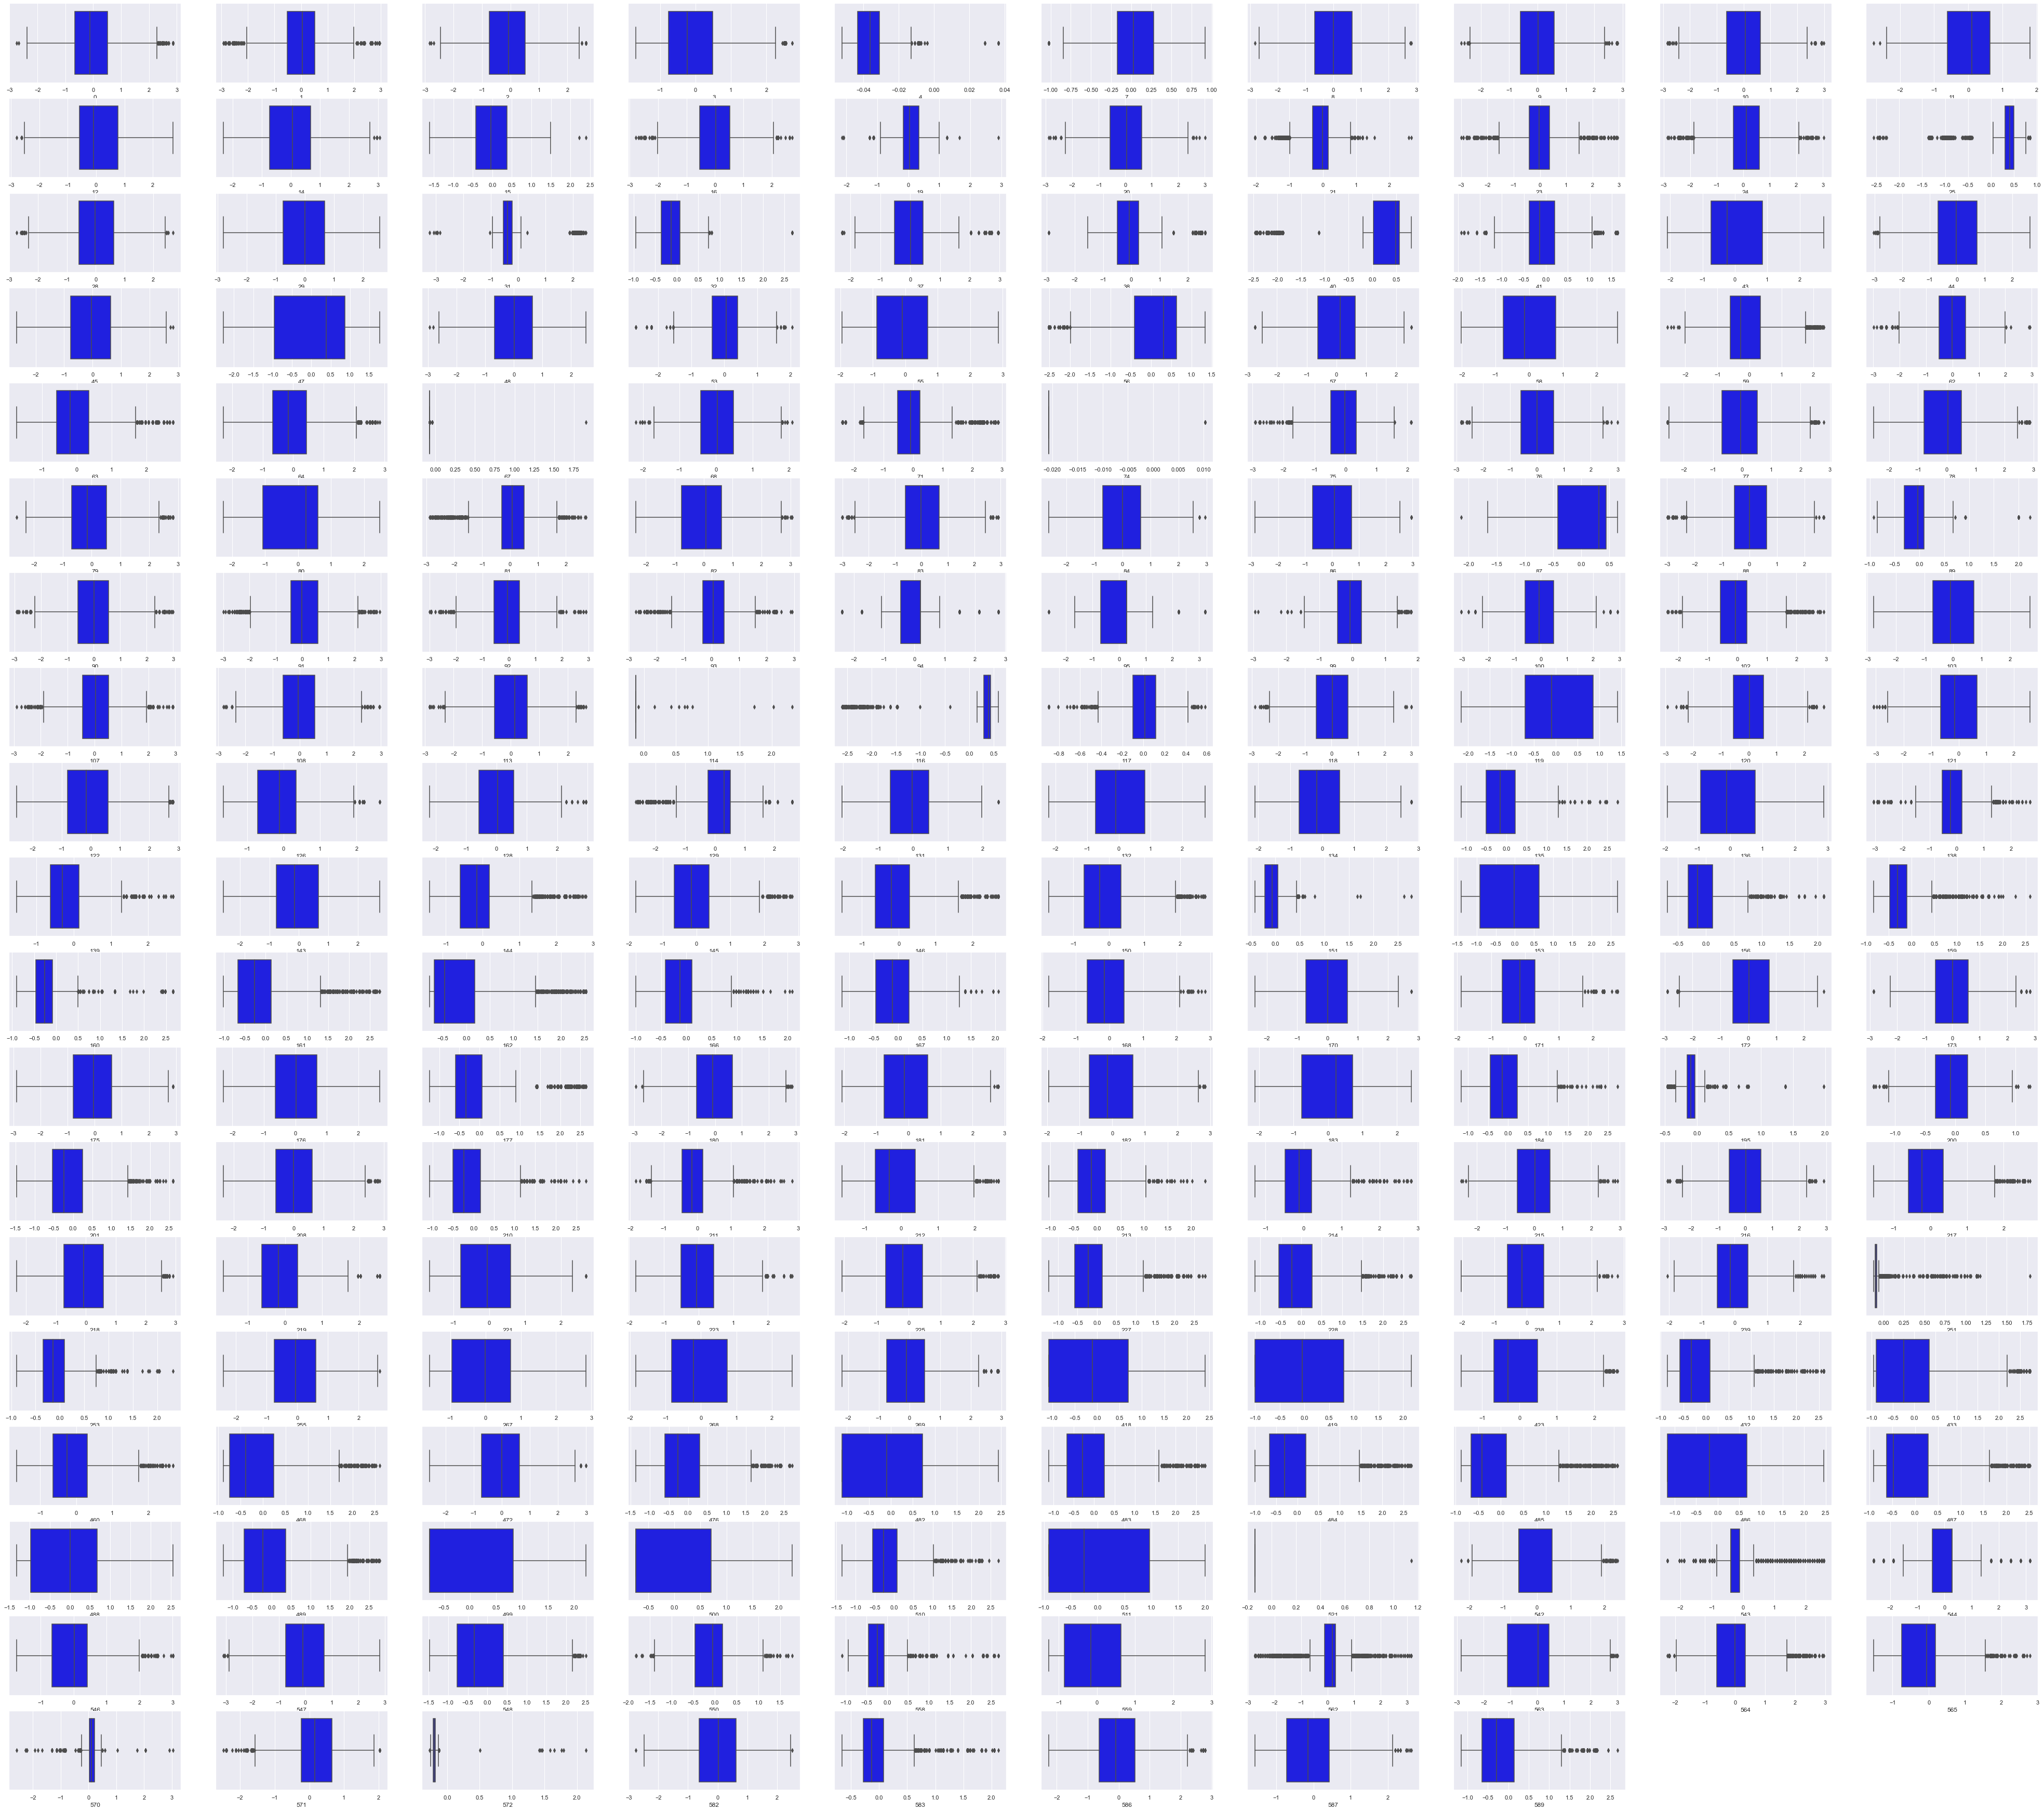

In [ ]:
plt.figure(figsize=(70, 70))
col = 1
for i in X_balanced_train_z_corrected.columns:
    plt.subplot(21,10, col)
    sns.boxplot(X_balanced_train_z_corrected[i],color='blue')
    col += 1

In [ ]:
# Summary of the dataset to analyse the varaince for every feature (standard deviation)

print(X_balanced_train_z_corrected.describe().T.to_string())

      count          mean       std       min       25%       50%       75%       max
0    2340.0 -3.035105e-02  0.950682 -2.739325 -0.661669 -0.129170  0.519960  2.868630
1    2340.0  4.463938e-03  0.924531 -2.932298 -0.518664  0.042900  0.513043  2.957849
2    2340.0 -4.113413e-02  0.876051 -2.840433 -0.747747 -0.072852  0.521683  2.649278
3    2340.0 -5.001753e-02  0.883712 -1.681682 -0.763060 -0.231322  0.481364  2.728252
4    2340.0 -3.582726e-02  0.010393 -0.052014 -0.043237 -0.036202 -0.031098  0.036418
7    2340.0  4.373151e-02  0.324958 -1.025818 -0.172357  0.028458  0.279476  0.915389
8    2340.0  8.765013e-03  0.984970 -2.831371 -0.659167  0.006340  0.690458  2.818741
9    2340.0 -1.016450e-02  0.972340 -2.689924 -0.604164  0.019663  0.586464  2.819108
10   2340.0 -2.726594e-03  0.974927 -2.833075 -0.626924  0.067030  0.615978  2.987850
11   2340.0  1.286018e-02  0.830506 -2.766602 -0.605958  0.096902  0.643571  1.815004
12   2340.0  8.634411e-03  0.928334 -2.795859 -0.58256

In [ ]:
# From the Box plot and the summary of the dataset we see that some columns have very low variance and hence does not add much information to the target result. Hence we filter and drop such columns from the dataset

df = X_balanced_train_z_corrected.loc[:, X_balanced_train_z_corrected.std()<0.09]
df.shape

(2340, 5)

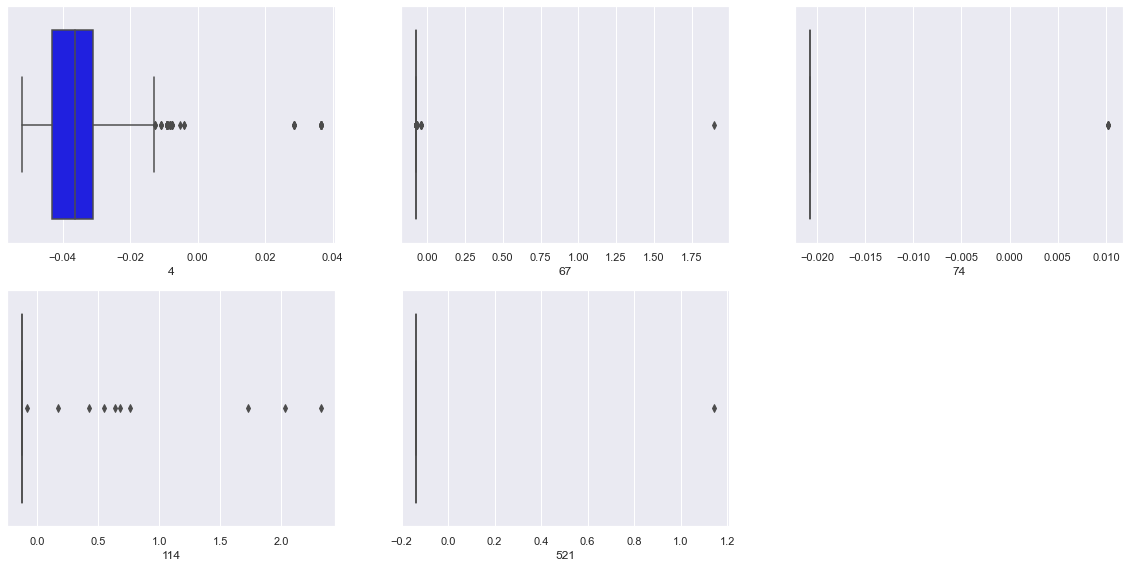

In [ ]:
plt.figure(figsize=(20, 20))
col = 1
for i in df.columns:
    plt.subplot(4,3,col)
    sns.boxplot(df[i],color='blue')
    col += 1

In [ ]:

# As per above box plot we drop only columns 67,74,114,521 from both balanced train and test sets except for 4 which does add some variance to the data that impacts the target but is a distribution comprising of highly negative values 

X_balanced_train_z_corrected_red = X_balanced_train_z_corrected.drop(['67','74', '114', '521'], axis = 1)
X_balanced_test_z_corrected_red = X_balanced_test_z_corrected.drop(['67','74', '114', '521'], axis = 1)

In [ ]:
# The remaining reduced number of columns, post dropping columns with almost very low variance

X_balanced_train_z_corrected_red.shape

(2340, 184)

In [ ]:
X_balanced_test_z_corrected_red.shape

(586, 184)

**FEATURE ELIMINATION BASED ON REMOVAL OF INPUT FEATURE WITH VERY LOW CORRELATION WITH TARGET VARIABLE**

In [ ]:
# Function that returns non-correlated features based of a given threshold

def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [ ]:
# in order to find the correlation with target, I have to add target as a column to dummy_X_balanced_train_z_corrected_red

dummy_X_balanced_train_z_corrected_red = X_balanced_train_z_corrected_red.copy()
dummy_X_balanced_train_z_corrected_red['target'] = y_balanced_train


In [ ]:
# Extracting non-correlated features from dataset with correlation 

corrwith_cols = corrwith_target(dummy_X_balanced_train_z_corrected_red, 'target', 0.05)

X_balanced_train_z_corrected_red = X_balanced_train_z_corrected_red.drop(corrwith_cols, axis=1)
X_balanced_test_z_corrected_red = X_balanced_test_z_corrected_red.drop(corrwith_cols, axis=1)

n_features4 = X_balanced_train_z_corrected_red.shape[1]
print(f'After removing {len(corrwith_cols)} features, there are {n_features4} features left.')

After removing 81 features, there are 103 features left.


In [ ]:
# The remaining reduced number of columns, post dropping columns with correlation less than 0.05 with the target 'Pass/Fail' variable

X_balanced_train_z_corrected_red.shape

(2340, 103)

**FEATURE SELECTION THROUGH RECURSSIVE FEATURE ELIMINATION**

In [ ]:
from sklearn.metrics import matthews_corrcoef, make_scorer

mcc_scorer = make_scorer(matthews_corrcoef)

rfecv = RFECV(estimator=LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),
              cv=StratifiedKFold(2),
              scoring =  mcc_scorer)
rfecv.fit(X_balanced_train_z_corrected_red, y_balanced_train.values.ravel())
 

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=200, class_weight='balanced',
                                   random_state=42, solver='liblinear'),
      scoring=make_scorer(matthews_corrcoef))

In [ ]:
mask = rfecv.get_support()
columns = X_balanced_train_z_corrected_red.columns
selected_cols = columns[mask]
n_features5 = len(selected_cols)
X_train_rfe = pd.DataFrame(rfecv.transform(X_balanced_train_z_corrected_red), columns = selected_cols)
X_test_rfe = pd.DataFrame(rfecv.transform(X_balanced_test_z_corrected_red), columns = selected_cols)

In [ ]:
# Testing the RFECV transformed data using hypertuned Gaussion Naive Bayes model to check on Performance improvement achieved

GNB_rfe = GaussianNB(var_smoothing=0.01873817422860384)
GNB_rfe.fit(X_train_rfe, y_balanced_train)

GaussianNB(var_smoothing=0.01873817422860384)

In [ ]:
GNB_rfe_score = GNB_rfe.score(X_train_rfe, y_balanced_train)
print('Accuracy Score of Training Data: ', GNB_rfe_score)

Accuracy Score of Training Data:  0.7824786324786325


In [ ]:
GNB_rfe_y_predict= GNB_rfe.predict(X_test_rfe)
GNB_rfe_score = accuracy_score(y_balanced_test, GNB_rfe_y_predict)
print('Accuracy Score of Test Data:', GNB_rfe_score)

Accuracy Score of Test Data: 0.742320819112628


**DIMENSIONALITY REDUCTION THROUGH PCA FOR MODEL PERFORMANCE IMPROVEMENT**

In [ ]:
# Covariance matrix required for PCA Analysis

covMatrix = np.cov(X_train_rfe,rowvar=False)
print(covMatrix)

[[ 7.67465203e-01  1.18310967e-03  6.24233359e-02 ... -9.51669642e-03
  -2.16775876e-02 -1.82461952e-02]
 [ 1.18310967e-03  1.08004632e-04  8.61088813e-04 ... -1.38786843e-04
   1.61910570e-04  4.00263954e-04]
 [ 6.24233359e-02  8.61088813e-04  9.45445263e-01 ...  6.91273044e-03
   1.20967958e-02 -1.79433549e-02]
 ...
 [-9.51669642e-03 -1.38786843e-04  6.91273044e-03 ...  1.77922501e-01
   2.80298283e-02  1.97112546e-02]
 [-2.16775876e-02  1.61910570e-04  1.20967958e-02 ...  2.80298283e-02
   8.02319550e-01  7.57965682e-02]
 [-1.82461952e-02  4.00263954e-04 -1.79433549e-02 ...  1.97112546e-02
   7.57965682e-02  6.79337350e-01]]


In [ ]:
pca = PCA(n_components=40)
pca.fit(X_train_rfe)

PCA(n_components=40)

In [ ]:
# Percentage of variation explained by each Eigen Vector

print(pca.explained_variance_ratio_)

[0.06824062 0.05385165 0.04736306 0.04365347 0.03969468 0.03834988
 0.03513163 0.03264876 0.03127732 0.02891963 0.02858533 0.02723644
 0.02558458 0.02467848 0.02355217 0.02237928 0.02205252 0.02142131
 0.02021308 0.01954053 0.01922341 0.01765825 0.0168055  0.01603822
 0.01584688 0.01556731 0.01519616 0.01461362 0.0138901  0.01324992
 0.0127182  0.0122471  0.01160525 0.01110529 0.01093667 0.0103806
 0.01002045 0.00938157 0.00920018 0.00867096]


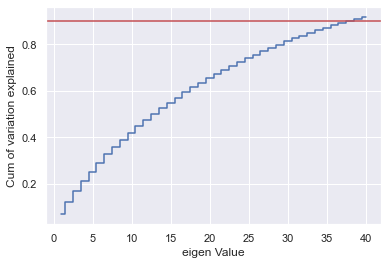

In [ ]:
plt.step(range(1,41),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

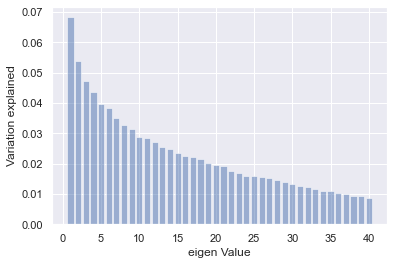

In [ ]:
plt.bar(range(1,41),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
# Applying 37 principal components to fit the Scaled and balanced X data

pca37 = PCA(n_components=37)
pca37.fit(X_train_rfe)
print(pca37.components_, "\n\n")
print(pca37.explained_variance_ratio_)
X_train_rfe_pca37 = pca37.transform(X_train_rfe)
X_test_rfe_pca37 = pca37.transform(X_test_rfe)

[[ 1.34091432e-01 -5.83694283e-05 -5.23679882e-02 ...  2.20900391e-02
  -9.05247656e-02  3.17824116e-03]
 [-6.33657576e-02 -7.82263197e-04 -1.25755008e-01 ...  1.31108587e-02
  -6.35108666e-02  1.42898124e-01]
 [-1.90578157e-02  1.25716207e-04  1.88873701e-01 ... -7.89039584e-03
   5.68274429e-02 -4.22470544e-02]
 ...
 [ 1.75195475e-01  5.72380102e-04 -1.72188269e-01 ... -7.32766090e-02
  -7.03268106e-03  1.36984698e-01]
 [ 8.38557607e-02  7.21403970e-04 -1.03874477e-02 ...  1.93508167e-02
  -8.52283526e-02  1.18859800e-03]
 [ 2.05078970e-01  2.12862041e-04  4.12793480e-02 ... -2.32909790e-02
  -1.81217704e-02  7.25846753e-02]] 


[0.06824062 0.05385165 0.04736306 0.04365347 0.03969468 0.03834988
 0.03513163 0.03264876 0.03127732 0.02891963 0.02858533 0.02723644
 0.02558458 0.02467848 0.02355216 0.02237928 0.02205251 0.02142131
 0.02021308 0.01954042 0.01922341 0.01765824 0.01680516 0.01603819
 0.01584687 0.01556729 0.01519602 0.01461354 0.01388988 0.01324996
 0.01271705 0.01224494 0.0

In [ ]:
# Testing the PCA transformed data using hypertuned Gaussion Naive Bayes model to check on Performance improvement achieved

GNB_rfe_pca = GaussianNB(var_smoothing=0.01873817422860384)
GNB_rfe_pca.fit(X_train_rfe_pca37, y_balanced_train)


GNB_rfe_pca_train_score = GNB_rfe_pca.score(X_train_rfe_pca37, y_balanced_train)
print('Accuracy Score of Training Data: ', GNB_rfe_pca_train_score)

Accuracy Score of Training Data:  0.8346153846153846


In [ ]:
GNB_rfe_pca_predict= GNB_rfe_pca.predict(X_test_rfe_pca37)
GNB_rfe_pca_test_score = accuracy_score(y_balanced_test, GNB_rfe_pca_predict)
print('Accuracy Score of Test Data:', GNB_rfe_pca_test_score)

Accuracy Score of Test Data: 0.8327645051194539


In [ ]:
# printing classification report

print("Classification Report for Gaussian Naive Bayes Model")
print(metrics.classification_report(y_balanced_test, GNB_rfe_pca_predict, labels=[1, 0]))

Classification Report for Gaussian Naive Bayes Model
              precision    recall  f1-score   support

           1       0.86      0.80      0.83       300
           0       0.81      0.87      0.84       286

    accuracy                           0.83       586
   macro avg       0.83      0.83      0.83       586
weighted avg       0.83      0.83      0.83       586



In [ ]:
# 5.F.

# XGBOOST MODEL


XGB_model = XGBClassifier()
XGB_model.fit(X_train_rfe_pca37, y_balanced_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# Hyperparameter Tuning of XGBoost Model

# A parameter grid for XGBoost

params = {
        'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
        'min_child_weight': [1,3,5,7,10],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.3,0.4,0.5,0.6, 0.7, 0.8, 1.0],
        'max_depth': [3,4,5,6,8,10,12,15]
        }

In [ ]:
random_search = RandomizedSearchCV (XGB_model, param_distributions = params,n_iter=5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3)
random_search.fit(X_train_rfe_pca37,y_balanced_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1.0],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1,
                                                  1.5, 2, 5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Best Parameter values out of the inputed parameter values to Random Search CV for XGBoost Model
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.6}

In [ ]:
# Combining Test & Train Data for K-Fold Cross Validation

X_train_df = pd.DataFrame(X_train_rfe_pca37, columns = range(1,38))
X_test_df = pd.DataFrame(X_test_rfe_pca37, columns = range(1,38))

X = pd.concat([X_train_df,X_test_df])
y = pd.concat([y_balanced_train,y_balanced_test])

In [ ]:
def cross_val(hyper_model):
    num_folds = 10
    seed = 7

    kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)
    results = cross_val_score (hyper_model, X, y, cv=kfold)

    print(results)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

In [ ]:
# printing classification report

def classification_report(hyper_model, str):
    print("Classification Report for "+ str +" on Test Data")

    hyper_model.fit(X_train_rfe_pca37, y_balanced_train)
    hyper_y_test_predict = hyper_model.predict(X_test_rfe_pca37)

    print(metrics.classification_report(y_balanced_test, hyper_y_test_predict, labels=[1, 0]))

In [ ]:
# K-Fold Cross Validation For Hypertuned XGBoost Model and Classification Report for the test data

XGB_hyper_model = XGBClassifier(subsample = 0.8,min_child_weight = 3, max_depth = 8, learning_rate = 0.3, gamma = 0.1, colsample_bytree = 1.0)
cross_val(XGB_hyper_model)
print("\n\n")
classification_report(XGB_hyper_model, "XGBoost Model")

[0.99317406 0.99317406 0.98293515 0.98634812 1.         0.98634812
 0.98972603 0.99315068 0.99657534 1.        ]
Accuracy: 99.214% (0.551%)



Classification Report for XGBoost Model on Test Data
              precision    recall  f1-score   support

           1       0.90      0.98      0.94       300
           0       0.97      0.89      0.93       286

    accuracy                           0.93       586
   macro avg       0.94      0.93      0.93       586
weighted avg       0.94      0.93      0.93       586



In [ ]:
# Hyperparameter Tuning of Logistic Regression Model

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create hyperparameter options
hyperparameters = dict(C=[100, 10, 1.0, 0.1, 0.01] , penalty=penalty, solver = ['newton-cg', 'lbfgs', 'liblinear'],)

LR_model = LogisticRegression()

In [ ]:
random_search_lr = RandomizedSearchCV(LR_model, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [ ]:
random_search_lr.fit(X_train_rfe_pca37,y_balanced_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1)

In [ ]:
# Best Parameter values out of the inputed parameter values to Random Search CV for Logistic Regression Model
random_search_lr.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [ ]:
# K-Fold cross validation and classification report of test data for Logistic regression model

LR_hyper_model = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.01)
cross_val(LR_hyper_model)
print("\n\n")
classification_report(LR_hyper_model, "Logistic Regression Model")

[0.75767918 0.74744027 0.76791809 0.778157   0.7883959  0.77474403
 0.76712329 0.7739726  0.76369863 0.7739726 ]
Accuracy: 76.931% (1.080%)



Classification Report for Logistic Regression Model on Test Data
              precision    recall  f1-score   support

           1       0.82      0.76      0.79       300
           0       0.77      0.82      0.79       286

    accuracy                           0.79       586
   macro avg       0.79      0.79      0.79       586
weighted avg       0.79      0.79      0.79       586



In [ ]:
# K-NEAREST NEIGHBOURS MODEL

k_range=list(range(1,31))
options=['uniform', 'distance']

param_dist = dict(n_neighbors=k_range, weights=options)

KNN_model = KNeighborsClassifier()
random_search_knn= RandomizedSearchCV(KNN_model, param_dist, cv=10, scoring='accuracy', n_iter=100, random_state=1, verbose=0, n_jobs=-1)
random_search_knn.fit(X_train_rfe_pca37,y_balanced_train)



RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='accuracy')

In [ ]:
# Best Parameter values out of the inputed parameter values to Random Search CV for KNN Model

random_search_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 1}

In [ ]:
# K-Fold Cross Validation For Hypertuned K-Nearest Neighbours Model and classification report

KNN_hyper_model = KNeighborsClassifier(weights = 'uniform', n_neighbors = 1)
cross_val(KNN_hyper_model)
print("\n\n")
classification_report(KNN_hyper_model, "K-Nearest Neighbour Model")

[0.96928328 0.95904437 0.96928328 0.97269625 0.97610922 0.95904437
 0.96232877 0.97260274 0.96917808 0.96232877]
Accuracy: 96.719% (0.576%)



Classification Report for K-Nearest Neighbour Model on Test Data
              precision    recall  f1-score   support

           1       1.00      0.94      0.97       300
           0       0.94      1.00      0.97       286

    accuracy                           0.97       586
   macro avg       0.97      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586



In [ ]:
# SUPPORT VECTOR MACHINE MODEL
from sklearn.svm import SVC

SVM_model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
random_search_svm= RandomizedSearchCV(SVM_model, param_grid, cv=10, scoring='accuracy', n_iter=100, random_state=1, verbose=0, n_jobs=-1)
random_search_svm.fit(X_train_rfe_pca37,y_balanced_train)

RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=1, scoring='accuracy')

In [ ]:
# Best Parameter values out of the inputed parameter values to Random Search CV for SVM Model
random_search_svm.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 1}

In [ ]:
# K-Fold Cross Validation For Hypertuned SVMs Model and classification report for test data

SVM_hyper_model = SVC(kernel = 'rbf', gamma = 1, C = 1)
cross_val(SVM_hyper_model)
print("\n\n")
classification_report(SVM_hyper_model, "SVM Model")

[0.99317406 1.         0.99658703 0.99658703 1.         0.98293515
 0.99315068 1.         1.         0.99657534]
Accuracy: 99.590% (0.502%)



Classification Report for SVM Model on Test Data
              precision    recall  f1-score   support

           1       0.66      1.00      0.80       300
           0       1.00      0.47      0.64       286

    accuracy                           0.74       586
   macro avg       0.83      0.73      0.72       586
weighted avg       0.83      0.74      0.72       586



In [ ]:
# ADABOOST MODEL

from sklearn.ensemble import AdaBoostClassifier

grid_params = {'learning_rate':[0.25,0.5,0.75,1.],'n_estimators': [100,200,300,500]}

ADA_model = AdaBoostClassifier()

random_search_ada= RandomizedSearchCV(ADA_model, grid_params, cv=10, scoring='accuracy', n_iter=100, random_state=1, verbose=0, n_jobs=-1)
random_search_ada.fit(X_train_rfe_pca37,y_balanced_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.5, 0.75, 1.0],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=1, scoring='accuracy')

In [ ]:
# Best Parameter values out of the inputed parameter values to Random Search CV for Adaboost Model
random_search_ada.best_params_

{'n_estimators': 500, 'learning_rate': 1.0}

In [ ]:
# K-Fold Cross Validation For Hypertuned Adaboost model and classification report for test data

ADA_hyper_model = AdaBoostClassifier(n_estimators = 500, learning_rate =  1.0)
cross_val(ADA_hyper_model)
print("\n\n")
classification_report(ADA_hyper_model, "Adaboost Model")

[0.96928328 0.95221843 0.97269625 0.95904437 0.97610922 0.95904437
 0.97945205 0.95205479 0.94520548 0.97260274]
Accuracy: 96.377% (1.116%)



Classification Report for Adaboost Model on Test Data
              precision    recall  f1-score   support

           1       0.79      0.95      0.86       300
           0       0.94      0.73      0.82       286

    accuracy                           0.85       586
   macro avg       0.86      0.84      0.84       586
weighted avg       0.86      0.85      0.84       586



In [ ]:
# RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


RF_model = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(RF_model, random_grid, cv=10, scoring='accuracy', n_iter=100, random_state=1, verbose=0, n_jobs=-1)
random_search_rf.fit(X_train_rfe_pca37,y_balanced_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=1, scoring='accuracy')

In [ ]:
# Best Parameter values out of the inputed parameter values to Random Search CV for Random Forest Model
random_search_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
# K-Fold Cross Validation For Hypertuned Random Forest model and classification report for test data

RF_hyper_model = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, min_samples_leaf = 1, max_features = 'auto', max_depth = 80, bootstrap = False)
cross_val(RF_hyper_model)
print("\n\n")
classification_report(RF_hyper_model, "Random Forest Model")

[0.99317406 1.         0.99658703 0.99317406 0.99658703 0.98634812
 0.99657534 1.         1.         1.        ]
Accuracy: 99.624% (0.417%)



Classification Report for Random Forest Model on Test Data
              precision    recall  f1-score   support

           1       0.79      1.00      0.88       300
           0       1.00      0.73      0.84       286

    accuracy                           0.87       586
   macro avg       0.90      0.86      0.86       586
weighted avg       0.89      0.87      0.86       586



In [ ]:
# GAUSSIAN NAIVE BAYES

# Hyperparameter already calculated : var_smoothing = 0.01873817422860384

GNB_hyper_model = GaussianNB(var_smoothing=0.01873817422860384)
GNB_hyper_model.fit(X_train_rfe_pca37,y_balanced_train)

cross_val(GNB_hyper_model)
print("\n\n")
classification_report(GNB_hyper_model, "Gaussian Naive Bayes Model")

[0.87030717 0.81228669 0.778157   0.86348123 0.83276451 0.84641638
 0.83219178 0.81164384 0.81164384 0.81849315]
Accuracy: 82.774% (2.605%)



Classification Report for Gaussian Naive Bayes Model on Test Data
              precision    recall  f1-score   support

           1       0.86      0.80      0.83       300
           0       0.81      0.87      0.84       286

    accuracy                           0.83       586
   macro avg       0.83      0.83      0.83       586
weighted avg       0.83      0.83      0.83       586



In [ ]:
# Print Accuracy Function

def accuracy(hyper_model, str):
  train_score = hyper_model.score(X_train_rfe_pca37, y_balanced_train)
  print('Accuracy Score of Training Data For ' + str + ':', train_score)
    
  test_score = hyper_model.score(X_test_rfe_pca37, y_balanced_test)
  print('Accuracy Score of Test Data For  ' + str + ':', test_score)

In [ ]:
accuracy(XGB_hyper_model, "XGBoost Model")
print("\n\n")
accuracy(LR_hyper_model, "Logistic Regression Model")
print("\n\n")
accuracy(KNN_hyper_model, "KNN Model")
print("\n\n")
accuracy(SVM_hyper_model, "SVM Model")
print("\n\n")
accuracy(ADA_hyper_model, "Adaboost Model")
print("\n\n")
accuracy(RF_hyper_model, "Random Forest Model")
print("\n\n")
accuracy(GNB_hyper_model, "Gaussian Naive Bayes Model")

Accuracy Score of Training Data For XGBoost Model: 1.0
Accuracy Score of Test Data For  XGBoost Model: 0.9334470989761092



Accuracy Score of Training Data For Logistic Regression Model: 0.7658119658119659
Accuracy Score of Test Data For  Logistic Regression Model: 0.7918088737201365



Accuracy Score of Training Data For KNN Model: 1.0
Accuracy Score of Test Data For  KNN Model: 0.9709897610921502



Accuracy Score of Training Data For SVM Model: 1.0
Accuracy Score of Test Data For  SVM Model: 0.7406143344709898



Accuracy Score of Training Data For Adaboost Model: 1.0
Accuracy Score of Test Data For  Adaboost Model: 0.8464163822525598



Accuracy Score of Training Data For Random Forest Model: 1.0
Accuracy Score of Test Data For  Random Forest Model: 0.8668941979522184



Accuracy Score of Training Data For Gaussian Naive Bayes Model: 0.8346153846153846
Accuracy Score of Test Data For  Gaussian Naive Bayes Model: 0.8327645051194539


In [ ]:
# Pickling the Best Model

pickle.dump(KNN_hyper_model, open('KNN_hyper_model.pkl', 'wb'))